<a href="https://colab.research.google.com/github/Arnav2903/Telco-Churn-Predictor-PowerBI/blob/main/churn_analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# Load dataset directly
url = "https://raw.githubusercontent.com/treselle-systems/customer_churn_analysis/master/WA_Fn-UseC_-Telco-Customer-Churn.csv"
df = pd.read_csv(url)

# Quick look
print(df.shape)          # Should be (7043, 21)
df.head()

(7043, 21)


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
print(df.info())
print("\nChurn Distribution (%):")
print(df['Churn'].value_counts(normalize=True) * 100)

# ~26.5% churn – class imbalance is common in real churn data

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [4]:
# Convert TotalCharges to numeric
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

# Check & handle missing
print("Missing values:\n", df.isnull().sum())
df.dropna(inplace=True)  # Drops 11 rows

# Drop useless column
df.drop('customerID', axis=1, inplace=True)

# Convert target to numeric
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})

print("Cleaned shape:", df.shape)  # ~7032 rows
df.head()

Missing values:
 customerID           0
gender               0
SeniorCitizen        0
Partner              0
Dependents           0
tenure               0
PhoneService         0
MultipleLines        0
InternetService      0
OnlineSecurity       0
OnlineBackup         0
DeviceProtection     0
TechSupport          0
StreamingTV          0
StreamingMovies      0
Contract             0
PaperlessBilling     0
PaymentMethod        0
MonthlyCharges       0
TotalCharges        11
Churn                0
dtype: int64
Cleaned shape: (7032, 20)


,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,0
1,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,0
2,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,1
3,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,0
4,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,1


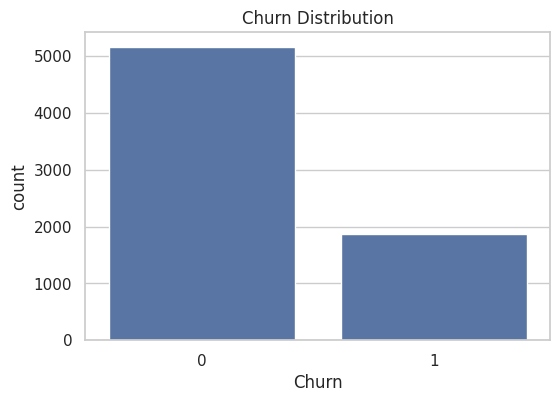

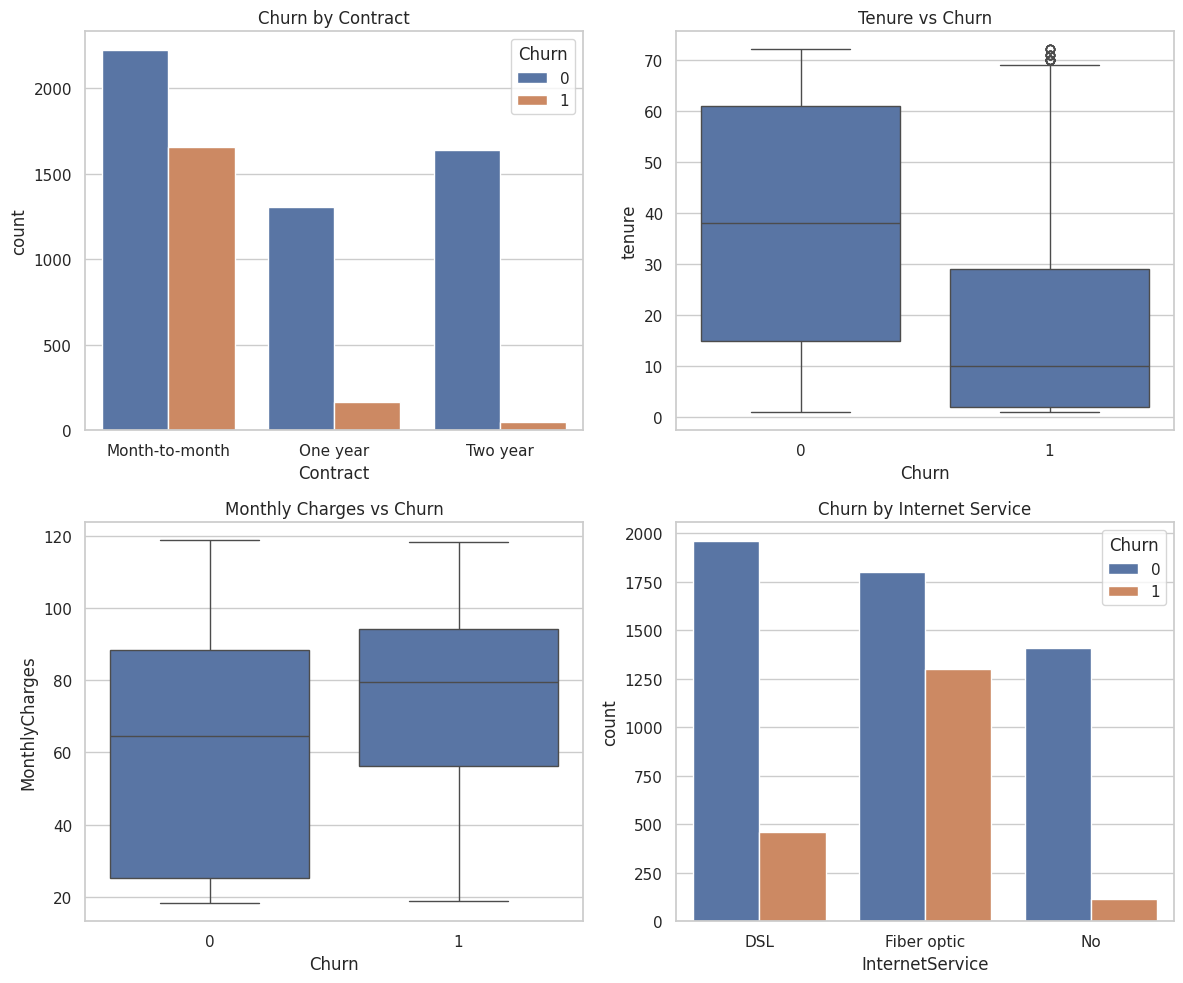

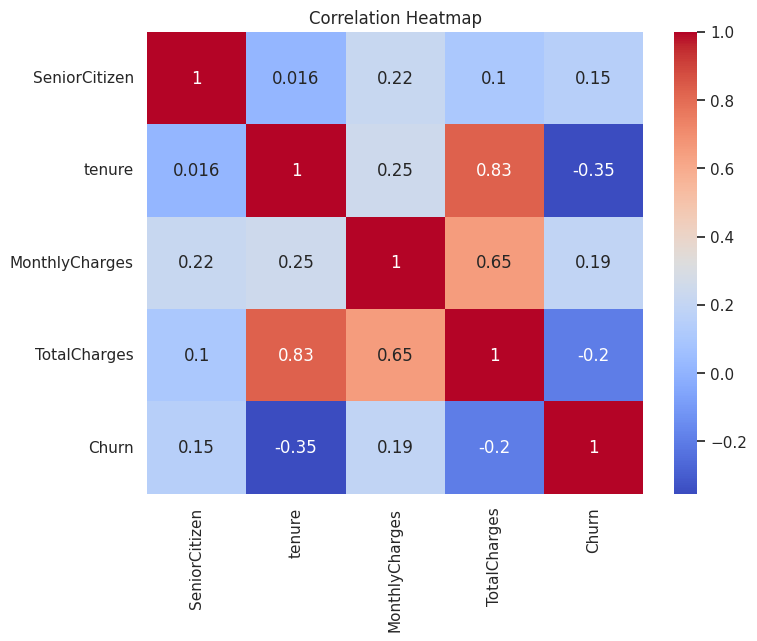

In [5]:
# Set style
sns.set(style="whitegrid")

# Churn distribution
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=df)
plt.title('Churn Distribution')
plt.show()

# Key drivers
fig, axes = plt.subplots(2, 2, figsize=(12,10))

sns.countplot(x='Contract', hue='Churn', data=df, ax=axes[0,0])
axes[0,0].set_title('Churn by Contract')

sns.boxplot(x='Churn', y='tenure', data=df, ax=axes[0,1])
axes[0,1].set_title('Tenure vs Churn')

sns.boxplot(x='Churn', y='MonthlyCharges', data=df, ax=axes[1,0])
axes[1,0].set_title('Monthly Charges vs Churn')

sns.countplot(x='InternetService', hue='Churn', data=df, ax=axes[1,1])
axes[1,1].set_title('Churn by Internet Service')

plt.tight_layout()
plt.show()

# Correlation (numeric only)
numeric_cols = df.select_dtypes(include=np.number).columns
plt.figure(figsize=(8,6))
sns.heatmap(df[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()

In [6]:
# New feature: Tenure groups
df['Tenure_Group'] = pd.cut(df['tenure'], bins=[0,12,24,48,60,df['tenure'].max()],
                            labels=['0-12m', '12-24m', '24-48m', '48-60m', '>60m'])

# One-hot encode categorical variables
cat_columns = df.select_dtypes(include='object').columns
df_encoded = pd.get_dummies(df, columns=cat_columns, drop_first=True)

print("Encoded shape:", df_encoded.shape)  # ~45-50 columns
df_encoded.head()

Encoded shape: (7032, 32)


,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,Tenure_Group,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,0-12m,False,True,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,24-48m,True,False,False,True,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,0-12m,True,False,False,True,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,24-48m,True,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,0-12m,False,False,False,True,...,False,False,False,False,False,False,True,False,True,False


In [12]:
from sklearn.preprocessing import StandardScaler

# Features & target
X = df_encoded.drop('Churn', axis=1)
y = df_encoded['Churn']

# One-hot encode the 'Tenure_Group' column, as it was missed in the previous encoding step
# It's a 'category' dtype, which select_dtypes(include='object') doesn't catch.
if 'Tenure_Group' in X.columns:
    X = pd.get_dummies(X, columns=['Tenure_Group'], drop_first=True)

# Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Scale features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Model
model = LogisticRegression(max_iter=1000) # Increased max_iter as suggested in the warning, and combined with scaling.
model.fit(X_train_scaled, y_train)

# Predictions
y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)[:, 1]  # Probability of churn

# Evaluation
print(classification_report(y_test, y_pred))
print("AUC Score:", roc_auc_score(y_test, y_prob))  # Expect ~0.84-0.85

# Confusion Matrix
confusion_matrix(y_test, y_pred)

              precision    recall  f1-score   support

           0       0.84      0.89      0.86      1033
           1       0.64      0.52      0.57       374

    accuracy                           0.79      1407
   macro avg       0.74      0.71      0.72      1407
weighted avg       0.78      0.79      0.79      1407

AUC Score: 0.8351033540231194


array([[921, 112],
       [178, 196]])

In [13]:
# Predict churn probability on entire dataset
df['Churn_Probability'] = model.predict_proba(scaler.transform(X))[:, 1]

# Flag high-risk (>50% probability)
df['High_Risk'] = np.where(df['Churn_Probability'] > 0.5, 'Yes', 'No')

# Potential annual revenue loss
df['Potential_Annual_Loss'] = np.where(df['High_Risk'] == 'Yes', df['MonthlyCharges'] * 12, 0)

# Summary insights
print("High-risk customers (%):", (df['High_Risk'] == 'Yes').mean() * 100)
print("Total potential annual loss ($):", df['Potential_Annual_Loss'].sum())

df[['tenure', 'MonthlyCharges', 'Churn', 'Churn_Probability', 'High_Risk', 'Potential_Annual_Loss']].head(10)

High-risk customers (%): 21.70079635949943
Total potential annual loss ($): 1461994.2


,tenure,MonthlyCharges,Churn,Churn_Probability,High_Risk,Potential_Annual_Loss
0,1,29.85,0,0.627258,Yes,358.2
1,34,56.95,0,0.037576,No,0.0
2,2,53.85,1,0.308955,No,0.0
3,45,42.30,0,0.024883,No,0.0
4,2,70.70,1,0.713164,Yes,848.4
5,8,99.65,1,0.838421,Yes,1195.8
6,22,89.10,0,0.418299,No,0.0
7,10,29.75,0,0.326813,No,0.0
8,28,104.80,1,0.612927,Yes,1257.6
9,62,56.15,0,0.014391,No,0.0


In [14]:
from google.colab import files

df.to_csv('telco_churn_enriched.csv', index=False)
files.download('telco_churn_enriched.csv')  # Auto-downloads!

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>